In [ ]:


import pandas as pd #pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
import pylab as pl #PyLab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space.
import numpy as np #numpy header

import matplotlib.pyplot as plt # graph ploting
%matplotlib inline # visualization On


pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.<br>
NumPy হল একটি linear algebra library , fast calulate

In [5]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
# We have downloaded a fuel consumption dataset

--2020-12-26 15:12:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   153KB/s    in 0.5s    

2020-12-26 15:12:50 (153 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [7]:
df = pd.read_csv("FuelConsumption.csv") # read data by pandas
# take a look at the dataset
df.head()  # যদি অনেক data থাকে, তাহলে 'head()' use করে অল্প data dekha jay 

# df = data frame


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
#Lets first have a descriptive exploration on our data.
# summarize the data
print(df)
df.describe() # Generate descriptive statistics.

      MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0          2014  ACURA  ...                       33          196
1          2014  ACURA  ...                       29          221
2          2014  ACURA  ...                       48          136
3          2014  ACURA  ...                       25          255
4          2014  ACURA  ...                       27          244
...         ...    ...  ...                      ...          ...
1062       2014  VOLVO  ...                       24          271
1063       2014  VOLVO  ...                       25          264
1064       2014  VOLVO  ...                       24          271
1065       2014  VOLVO  ...                       25          260
1066       2014  VOLVO  ...                       22          294

[1067 rows x 13 columns]


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
# Lets select some features to explore more.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9) #9 row taken

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


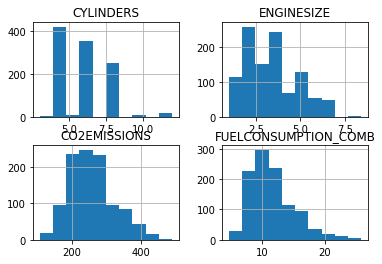

In [14]:
#we can plot each of these features:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist() #histrogram =hist()
plt.show()

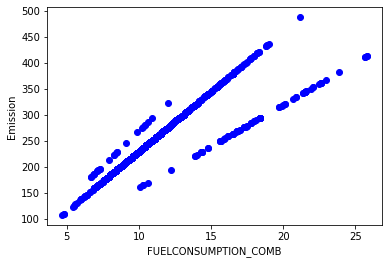

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

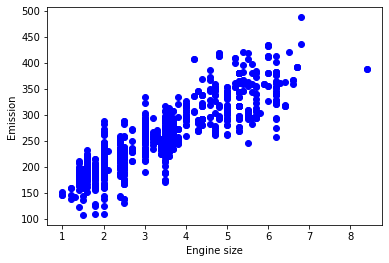

In [20]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

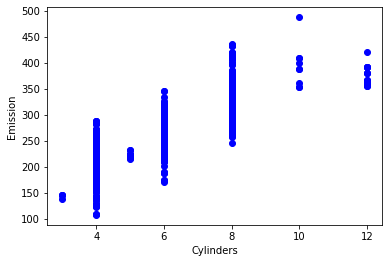

In [22]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [23]:
#Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:
#
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

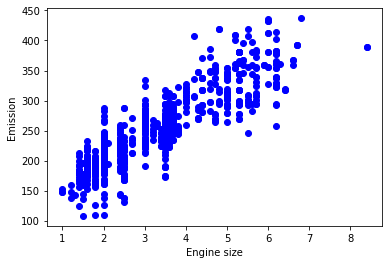

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [34]:
# Modeling
# Using sklearn package to model data.  sklearn= sciket learn
from sklearn import linear_model
regr = linear_model.LinearRegression() # regr is the object of linear regression
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_) #theta 1  
print ('Intercept: ',regr.intercept_)#theta 0 

#theta 1  is the coefficient
#theta 0 is the intercept
# rule: y= theta0 + theta1 * x
# to know more, video : https://www.youtube.com/watch?v=8jazNUpO3lQ

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Coefficients:  [[38.92710755]]
Intercept:  [125.10817822]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

# we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

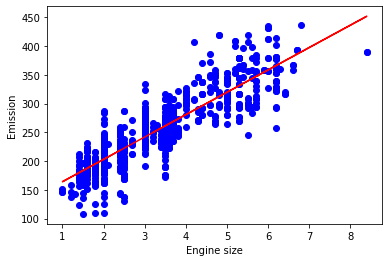

In [47]:
# we can plot the fit line over the data:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue') # graph এ blue dot দিয়ে প্লট করব
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r') # রেখা টানব, '-r'  - is for line  and r=red
#or
#plt.plot(train_x, regr.predict(train_x) , '-r') # রেখা টানব, '-r'  - is for line  and r=red

plt.xlabel("Engine size")
plt.ylabel("Emission")


# more about Plot() = https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

## Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.
<br>
There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
<br>
Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.<br>
Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.<br>
Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.<br>
R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']]) # x value
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # give result, to compare
test_y_hat = regr.predict(test_x) #predicting value based on the fit

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y))) # compare predicted value vs given value 'test_y'
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) ) # R_squre

Mean absolute error: 21.93
Residual sum of squares (MSE): 824.69
R2-score: 0.68
